In [1]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch_nn import TorchNN
from torch_nn_bn import TorchNNBN

In [2]:
olivetti_faces = fetch_olivetti_faces(data_home="./data", shuffle=True)
images = torch.tensor(olivetti_faces.data, dtype=torch.float)
targets = torch.tensor(olivetti_faces.target, dtype=torch.long)
datasets = [(img, lbl) for img, lbl in zip(images, targets)]
dl = torch.utils.data.DataLoader(datasets, batch_size=40, shuffle=True)

In [3]:
epochs = 120
learning_rate = 0.01

In [4]:
def train_model(epochs, model, lr):
    train_losses = []
    loss_fn = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=lr)
    for epoch in range(epochs):
        for img, target in dl:
            out = model(img.reshape(-1, 64 * 64))
            loss = loss_fn(out, target)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print(f'epoch {epoch}, loss {loss.item()}')
        train_losses.append(loss.item())
    return train_losses

In [5]:
def draw_train_losses(train_losses):
    for i, loss in enumerate(train_losses):
        plt.plot(loss, label=f'loss {i}')
    plt.legend()
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('train loss')
    plt.show()

In [6]:
model = TorchNN()
model_bn = TorchNNBN()
models = [model,model_bn]
train_hits = [train_model(epochs=epochs, model=model_,lr=learning_rate) for model_ in models]

epoch 0, loss 3.7108073234558105
epoch 1, loss 3.6897177696228027
epoch 2, loss 3.679943799972534
epoch 3, loss 3.670687198638916
epoch 4, loss 3.676949977874756
epoch 5, loss 3.6698803901672363
epoch 6, loss 3.669246196746826
epoch 7, loss 3.6505820751190186
epoch 8, loss 3.657092332839966
epoch 9, loss 3.658381700515747
epoch 10, loss 3.652552843093872
epoch 11, loss 3.662548780441284
epoch 12, loss 3.652132034301758
epoch 13, loss 3.6554248332977295
epoch 14, loss 3.645038604736328
epoch 15, loss 3.6468262672424316
epoch 16, loss 3.6595630645751953
epoch 17, loss 3.6347479820251465
epoch 18, loss 3.633967638015747
epoch 19, loss 3.6371452808380127
epoch 20, loss 3.611177444458008
epoch 21, loss 3.6249167919158936
epoch 22, loss 3.622567653656006
epoch 23, loss 3.5919628143310547
epoch 24, loss 3.5908451080322266
epoch 25, loss 3.6204276084899902
epoch 26, loss 3.5845890045166016
epoch 27, loss 3.5793328285217285
epoch 28, loss 3.5883185863494873
epoch 29, loss 3.5626769065856934
epo

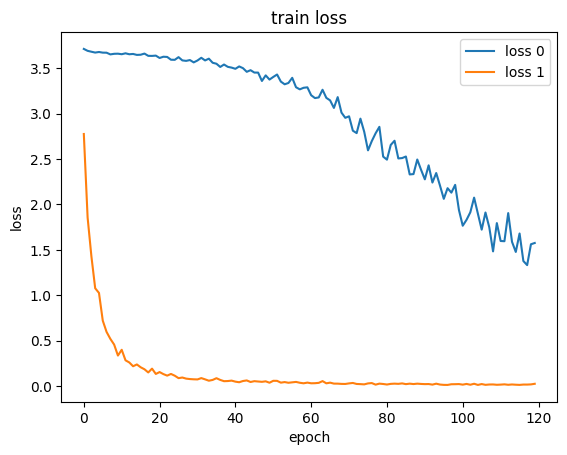

In [7]:
draw_train_losses(train_hits)